### IS727272 - Cordero Hernández, Marco Ricardo

# 7.2 K-Means Wines

You will implement the K-means algorithm with the dataset 'wines.data'. This dataset contain 14 features. For this reason, it is not possible to plot the centroids movement. We will implement only the cost function. (https://archive.ics.uci.edu/ml/datasets/wine)

In this exercise we will:

1. Load and split dataset
2. Implement Kmeans to classify xTrain dataset
3. Implement Logistics Regression to train an algorithm from the classification obtained in Kmeans
4. Compare results obtained from Logistics Regression and the original classification (yTrain)
5. Classify testing dataset, and compare with the original classification.

In [1]:
# Import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 1. Load dataset
data = pd.read_csv('./Datasets/wine.data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

x = dataset[:, 1:]
y = dataset[:, 0]
y = y.reshape(-1, 1)

y[y == 1] = 0 
y[y == 2] = 1
y[y == 3] = 2

print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 178 Columns: 14
x: (178, 13)
y: (178, 1)


In [4]:
# Split dataset
np.random.seed(1)
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142, 1)
(36, 13) (36, 1)


In [5]:
# KMeans Functions
def dist(p, q):
    diff = p - q
    return np.dot(diff.T, diff) # d

def min_dist(xi, mu):
    c = []
    k, n = mu.shape
    
    for i in range(k):
        c.append(dist(xi, mu[i]))
    
    indx = np.argmin(c)
    
    return indx

def min_dist_all(x, mu):
    m, n = x.shape
    c = np.zeros(m, dtype = int)
    
    for i in range(m):
        c[i] = min_dist(x[i], mu)
    
    return c

def move_centroids(x, c, k, mu):
    m, n = x.shape
    new_mu = np.zeros((k, n))
    
    for i in range(k):
        elements = x[c == i] # Elements with same centroids
        new_mu[i] = mu[i] if (not len(elements)) else np.sum(elements, axis = 0) / len(elements)
    
    return new_mu

def cost(x, c, mu):
    m, n = x.shape
    r = np.array([dist(x[i], mu[c[i]]) for i in range(m)])
    return (1 / m) * np.sum(r)

# return mu, c, cluster, J
def kmeans_model(x, k):
    # Initialize variables
    m, n = x.shape
    idx = np.random.choice(m, k)
    mu = x[idx]
    c = None
    J = []
    cluster = []
    it = 0

    while True:
        # Find new assignments
        new_c = min_dist_all(x, mu)
        J.append(cost(x, new_c, mu))
        cluster.append((np.copy(mu), np.copy(new_c)))

        it += 1
        # If no assignments have changed, we have finished.
        if np.all(c == new_c):
            break

        # if not, keep the new assignments,
        c = new_c

        # Update centroids, compute new means based on c
        mu = move_centroids(x, np.array(c), k, mu)              
    return mu, c, cluster, J

In [6]:
# KMeans model 
k = 3
mu, c, cluster, J = kmeans_model(x, k)
print(c)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


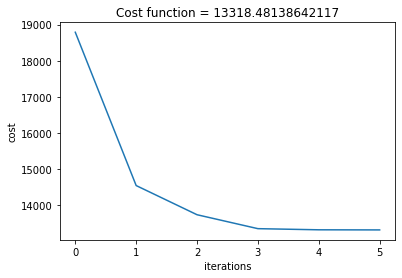

In [7]:
# Plot cost function
plt.plot(J)
plt.title('Cost function = ' + str(J[len(J)-1]))
plt.xlabel('iterations')
plt.ylabel('cost');

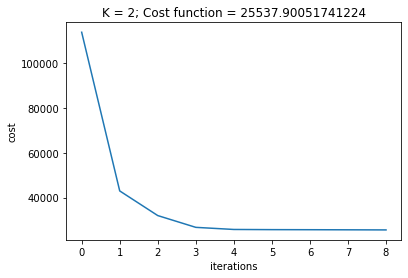

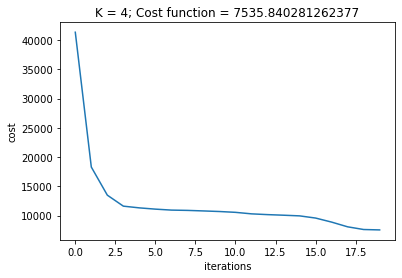

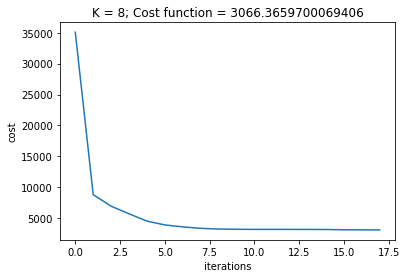

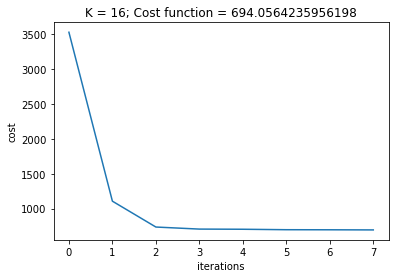

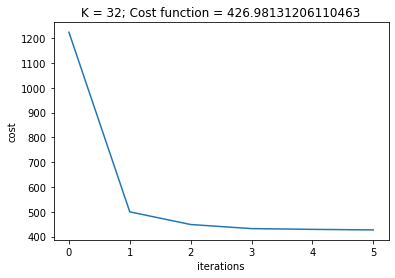

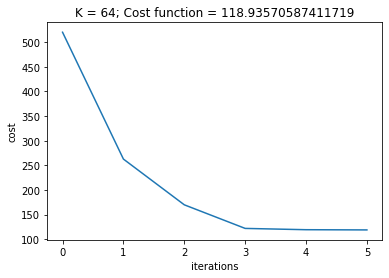

In [8]:
# Varying K
for i in range(1, 7):
    k = 2**i
    mu, c, cluster, J = kmeans_model(x, k)
    fig, ax = plt.subplots()
    ax.plot(J)
    ax.set_title(f'K = {k}; Cost function = ' + str(J[len(J)-1]))
    ax.set_xlabel('iterations')
    ax.set_ylabel('cost');